# Анализ востребованности у работодателей языков программирования в вакансиях на позицию Junior IT-специалиста

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("dataset.csv")

In [11]:
df.head()

,ID,VACANCY_TITLE,COMPANY_NAME,SALARY,CITY,DATE,PROGRAMMING_LANGUAGE,VACANCY_URL
0,94354526,Стажер-разработчик Python,Додо Пицца,150000.0,Ростов-на-Дону,2024-03-06,Python,https://hh.ru/vacancy/94354526
1,94450348,Junior Frontend разработчик,EasyDev,60000.0,Москва,2024-03-09,Python,https://hh.ru/vacancy/94450348
2,94228875,Junior Frontend разработчик,MacBuildServer,50000.0,Самара,2024-03-07,Python,https://hh.ru/vacancy/94228875
3,94120837,Python junior разработчик,Скиллтеллект,50000.0,Санкт-Петербург,2024-03-01,Python,https://hh.ru/vacancy/94120837
4,94293788,Junior Python-разработчик,СОГАЗ,NaN,Москва,2024-03-06,Python,https://hh.ru/vacancy/94293788


# Подготовка данных

### Заполняем пропуски

In [17]:
(df['SALARY'].isna().sum()) / len(df) * 100

30.15463917525773

In [20]:
avg_salary = df["SALARY"].mean().round()

In [21]:
avg_salary

73872.0

In [23]:
df["SALARY"] = df["SALARY"].fillna(avg_salary)

In [24]:
(df['SALARY'].isna().sum()) / len(df) * 100

0.0

In [25]:
df.head()

,ID,VACANCY_TITLE,COMPANY_NAME,SALARY,CITY,DATE,PROGRAMMING_LANGUAGE,VACANCY_URL
0,94354526,Стажер-разработчик Python,Додо Пицца,150000.0,Ростов-на-Дону,2024-03-06,Python,https://hh.ru/vacancy/94354526
1,94450348,Junior Frontend разработчик,EasyDev,60000.0,Москва,2024-03-09,Python,https://hh.ru/vacancy/94450348
2,94228875,Junior Frontend разработчик,MacBuildServer,50000.0,Самара,2024-03-07,Python,https://hh.ru/vacancy/94228875
3,94120837,Python junior разработчик,Скиллтеллект,50000.0,Санкт-Петербург,2024-03-01,Python,https://hh.ru/vacancy/94120837
4,94293788,Junior Python-разработчик,СОГАЗ,73872.0,Москва,2024-03-06,Python,https://hh.ru/vacancy/94293788


### Проверка дубликатов

In [27]:
df.duplicated().sum()

0

Дубликатов в записях нет

## Определяем самый востребованный у работодателей язык программирования среди junior-специалистов

In [28]:
prog_langs = df["PROGRAMMING_LANGUAGE"].unique()

In [40]:
df_prog_langs = pd.DataFrame(
    {
        "Python": len(df.loc[df["PROGRAMMING_LANGUAGE"] == "Python"]),
        "GO": len(df.loc[df["PROGRAMMING_LANGUAGE"] == "GO"]),
        "Java": len(df.loc[df["PROGRAMMING_LANGUAGE"] == "Java"]),
        "C++": len(df.loc[df["PROGRAMMING_LANGUAGE"] == "C++"]),
        "JS": len(df.loc[df["PROGRAMMING_LANGUAGE"] == "JS"]),
        "C#": len(df.loc[df["PROGRAMMING_LANGUAGE"] == "C#"]),
        "R": len(df.loc[df["PROGRAMMING_LANGUAGE"] == "R"]),
        "Rust": len(df.loc[df["PROGRAMMING_LANGUAGE"] == "Rust"]),
        "PHP": len(df.loc[df["PROGRAMMING_LANGUAGE"] == "PHP"]),
        "1C": len(df.loc[df["PROGRAMMING_LANGUAGE"] == "1C"]),
    },
    index=['amount']
)

In [41]:
df_prog_langs

,Python,GO,Java,C++,JS,C#,R,Rust,PHP,1C
amount,68,15,38,32,50,41,10,4,30,100


In [76]:
def create_bar_chart(row, color):    
    return sns.barplot(
        y=row.index.str.capitalize().values,
        x=row.values,
        orient="h",
        saturation=1,
        color=color,
        width=0.75,
    )

In [77]:
def set_seaborn_style(background_color, grid_color, text_color):
    sns.set_style({
        "axes.facecolor": background_color,
        "figure.facecolor": background_color,

        "grid.color": grid_color,
        "axes.edgecolor": grid_color,
        "axes.grid": True,
        "axes.axisbelow": True,
        
        "axes.labelcolor": text_color,
        "text.color": text_color,
        "xtick.color": text_color,
        "ytick.color": text_color,

        "xtick.bottom": False,
        "xtick.top": False,
        "ytick.left": False,
        "ytick.right": False,

        "axes.spines.left": False,
        "axes.spines.bottom": True,
        "axes.spines.right": False,
        "axes.spines.top": False,
    }
)

In [78]:
background_color = "#2F195F"
grid_color = "#582FB1"
bar_color = "#835ED4"
text_color = "#eee"

set_seaborn_style(background_color, grid_color, text_color)

In [79]:
def format_axes(ax):
    ax.tick_params("x", labelsize=20, pad=16)
    ax.tick_params("y", labelsize=20, pad=8)
    
    plt.xticks(
        ticks=ax.get_xticks()[:-1],
        labels=["{}".format(x) for x in ax.get_xticks()[:-1]]
    )

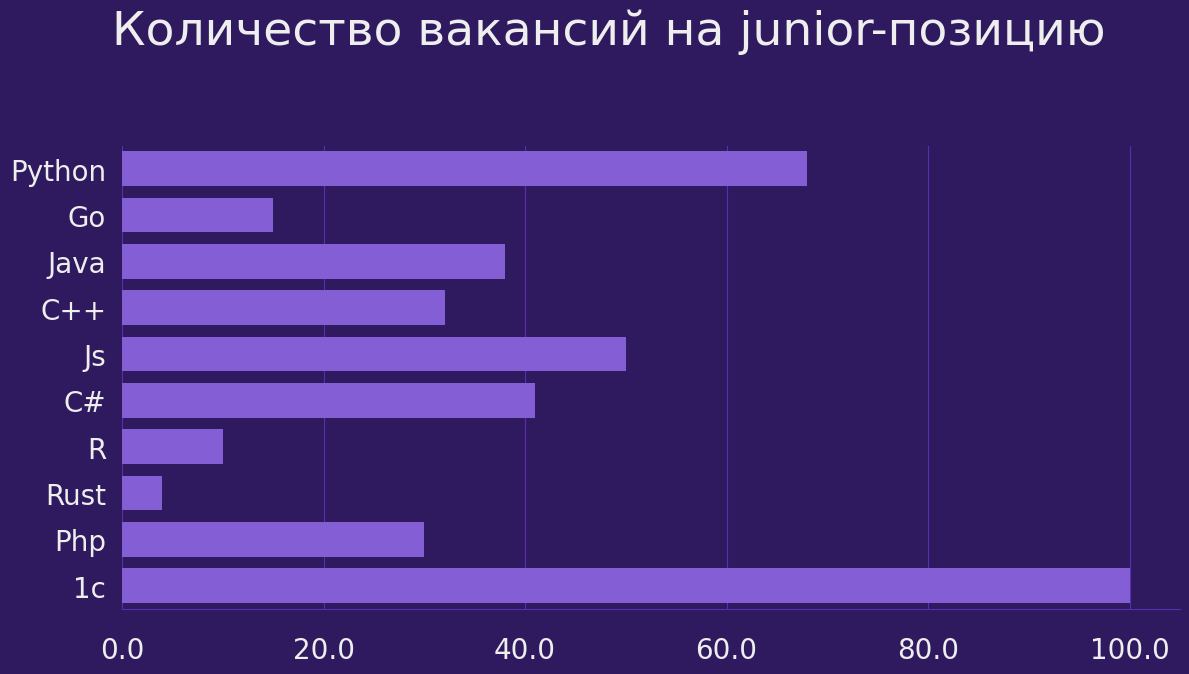

In [80]:
row = df_prog_langs.iloc[-1]

fig = plt.figure(figsize=(12, 7))
ax = create_bar_chart(row, color=bar_color)

# New function
format_axes(ax)

plt.title("Количество вакансий на junior-позицию", fontsize=34, y=1.2, x=0.46)
plt.tight_layout()
plt.show()

На графике видо, что больше всего junior-специалистов требуется по языку 1C.

Проверим средние зарплаты по каждому из языков

In [81]:
df_prog_langs_salary = pd.DataFrame(
    {
        "Python": df.loc[df["PROGRAMMING_LANGUAGE"] == "Python"]["SALARY"].mean(),
        "GO": df.loc[df["PROGRAMMING_LANGUAGE"] == "GO"]["SALARY"].mean(),
        "Java": df.loc[df["PROGRAMMING_LANGUAGE"] == "Java"]["SALARY"].mean(),
        "C++": df.loc[df["PROGRAMMING_LANGUAGE"] == "C++"]["SALARY"].mean(),
        "JS": df.loc[df["PROGRAMMING_LANGUAGE"] == "JS"]["SALARY"].mean(),
        "C#": df.loc[df["PROGRAMMING_LANGUAGE"] == "C#"]["SALARY"].mean(),
        "R": df.loc[df["PROGRAMMING_LANGUAGE"] == "R"]["SALARY"].mean(),
        "Rust": df.loc[df["PROGRAMMING_LANGUAGE"] == "Rust"]["SALARY"].mean(),
        "PHP": df.loc[df["PROGRAMMING_LANGUAGE"] == "PHP"]["SALARY"].mean(),
        "1C": df.loc[df["PROGRAMMING_LANGUAGE"] == "1C"]["SALARY"].mean(),
    },
    index=['mean_salary']
)

In [82]:
df_prog_langs_salary

,Python,GO,Java,C++,JS,C#,R,Rust,PHP,1C
mean_salary,72182.426471,75466.533333,77863.789474,82951.65625,72549.28,76226.853659,59361.6,73468.0,64261.6,74404.58


In [85]:
def format_axes(ax):
    ax.tick_params("x", labelsize=20, pad=16)
    ax.tick_params("y", labelsize=20, pad=8)
    
    plt.xticks(
        ticks=ax.get_xticks()[:-1],
        labels=["{}K".format(int(x / 1000)) for x in ax.get_xticks()[:-1]]
    )

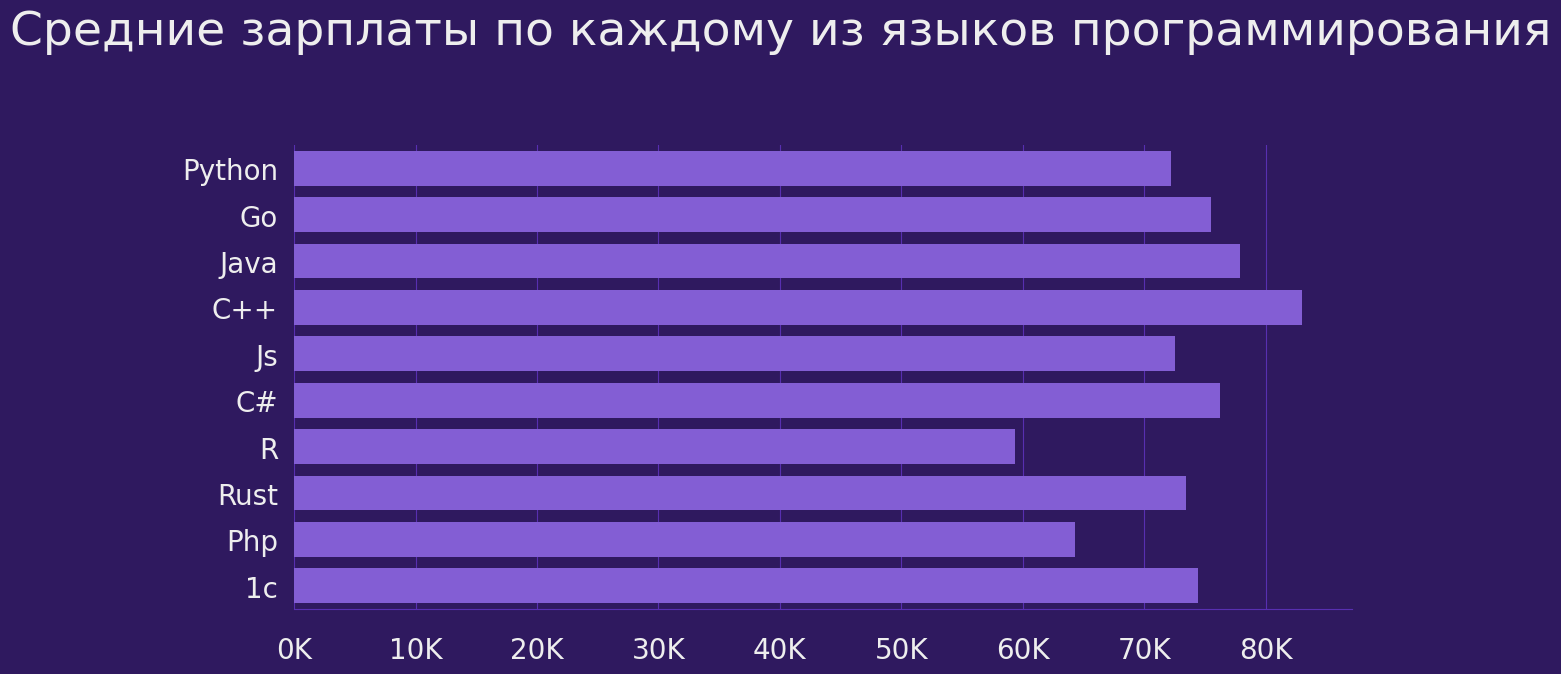

In [86]:
row = df_prog_langs_salary.iloc[-1]

fig = plt.figure(figsize=(12, 7))
ax = create_bar_chart(row, color=bar_color)

# New function
format_axes(ax)

plt.title("Средние зарплаты по каждому из языков программирования", fontsize=34, y=1.2, x=0.46)
plt.tight_layout()
plt.show()

In [94]:
f"Средняя зарплата по рынку: {df['SALARY'].mean().round()} руб."

'Средняя зарплата по рынку: 73872.0 руб.'

In [95]:
df["SALARY"].std()

41879.783907530764

Самые высокие зарплаты в месяц мы видим у C++. 1C же находится на 4 месте. Если работодатели имеют кадровый недостаток в 1С разработчиках, но не повышают ЗП, а предлагают среднюю зарплату по рынку (~74К руб.), то можно сделать вывод, что 